# The Project #
1. This is a project with minimal scaffolding. Expect to use the the discussion forums to gain insights! It’s not cheating to ask others for opinions or perspectives!
2. Be inquisitive, try out new things.
3. Use the previous modules for insights into how to complete the functions! You'll have to combine Pillow, OpenCV, and Pytesseract
4. There are hints provided in Coursera, feel free to explore the hints if needed. Each hint provide progressively more details on how to solve the issue. This project is intended to be comprehensive and difficult if you do it without the hints.

### The Assignment ###
Take a [ZIP file](https://en.wikipedia.org/wiki/Zip_(file_format)) of images and process them, using a [library built into python](https://docs.python.org/3/library/zipfile.html) that you need to learn how to use. A ZIP file takes several different files and compresses them, thus saving space, into one single file. The files in the ZIP file we provide are newspaper images (like you saw in week 3). Your task is to write python code which allows one to search through the images looking for the occurrences of keywords and faces. E.g. if you search for "pizza" it will return a contact sheet of all of the faces which were located on the newspaper page which mentions "pizza". This will test your ability to learn a new ([library](https://docs.python.org/3/library/zipfile.html)), your ability to use OpenCV to detect faces, your ability to use tesseract to do optical character recognition, and your ability to use PIL to composite images together into contact sheets.

Each page of the newspapers is saved as a single PNG image in a file called [images.zip](./readonly/images.zip). These newspapers are in english, and contain a variety of stories, advertisements and images. Note: This file is fairly large (~200 MB) and may take some time to work with, I would encourage you to use [small_img.zip](./readonly/small_img.zip) for testing.

Here's an example of the output expected. Using the [small_img.zip](./readonly/small_img.zip) file, if I search for the string "Christopher" I should see the following image:
![Christopher Search](./readonly/small_project.png)
If I were to use the [images.zip](./readonly/images.zip) file and search for "Mark" I should see the following image (note that there are times when there are no faces on a page, but a word is found!):
![Mark Search](./readonly/large_project.png)

Note: That big file can take some time to process - for me it took nearly ten minutes! Use the small one for testing.

In [47]:
import zipfile

import PIL

from PIL import Image
import pytesseract
import cv2 as cv
import numpy as np
import string

import kraken
from kraken import pageseg


# loading the face detection classifier
face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')

### the rest is up to you!

In [48]:
##### Functions #####


## we need to make a program that reads everyfile and making a list for words that apears in everyfile
##and checks f a specific word is in the list or not. and return true if it does and flase if it doesnt. 

#if returnd true we need to detect all the faces in that newspaper and return a black bar with all the faces.

# if there were no faces detected then write "But there were no faces in that file."

## itirate thrue loop for doing that for all the papers and printing all the answers in the end.




def PicToListOfWords (pic):
    '''Extracting the words in picture using tesseract and creating list of words in the page. 
    : param pic: A PIL.Image object.
    : return list: The list of words in the image. 

    '''
    #pic = Image.fromarray(pic, mode='L')
    text = pytesseract.image_to_string(pic)
    strng=text.lower()
    WordsList = []
    word = ''
    char_list = ['.', ',', ' ', '\t', '\n']
    for char in strng:
        
        if char in string.ascii_lowercase:
            word += char
            
        elif (char in char_list) and (word != ''):
            if word not in WordsList:
                WordsList.append(word)
            word = ''
            
    return WordsList
    
    
    
    
def FaceBar (pic):
    '''
    Generating Black bar with the faces in the picture. 
    params: 
         pic : A PiL.Image  - might be but doesnt have to be in mode "L"
    return:  ImageDraw object. 
    '''
    import numpy
    from PIL import ImageDraw
    pic = pic.convert('RGB')
    namp = numpy.array(pic)
    cv_img = cv.cvtColor(namp, cv.COLOR_RGB2GRAY)
    cv_img_bin=cv.threshold(img,120,255,cv.THRESH_BINARY)[1]
    faces = face_cascade.detectMultiScale(cv_img, 1.7) 
    #Generate List with Crop images.
    Crop_Images_List = []
    counter = 0
    for x,y,w,h in faces: 
        face_photo = pic.crop((x,y,x+w,y+h))
        counter += 1
        Crop_Images_List.append(face_photo) 
    #print(Crop_Images_List)
    if counter == 0:
        return  'Null'
    return box(Crop_Images_List, counter)

    
def box (photos_list, count):
    '''
    Generating photos bar from a photos list. 
    params:
        :photos_list = list with photos as PIL.Image. 
        :count = amount of photos in the list. 
    '''
    
    from PIL import ImageDraw
    mode = photos_list[0].mode
    #biggest size of everypicture will be 500 pixcels top in hight and width. 
    size = 100
    #generating Black sheet for 5 picturs in a row acording to the amount of photos.
    contact_sheet=PIL.Image.new(mode, (size*5,size*(int(count/5) + 1)))
    counter = 0
    #resizeing the pictures. 
    for img in photos_list:
        while (img.width >= size) or (img.height >= size):
            img = img.resize((int(img.width/1.2), int(img.height/1.2)))
        #pasting every Image to the black sheet in place. 
        contact_sheet.paste(img, (size*(counter%5), size*int(counter/5)))
        counter +=1
    return contact_sheet
    
    
def show_rects(pic, faces):
    from PIL import ImageDraw
    drawing=ImageDraw.Draw(pic)
    for x,y,w,h in faces:
    # And remember this is width and height so we have to add those appropriately.
        drawing.rectangle((x,y,x+w,y+h), outline="white")
    display(pic)
    return 
    
    
    
    

------ Generating File lists --------
started file: ['a-0.png', <PIL.Image.Image image mode=L size=3600x6300 at 0x7F9F2FE25128>]
started file: ['a-1.png', <PIL.Image.Image image mode=L size=3600x6300 at 0x7F9F2FE250F0>]
started file: ['a-2.png', <PIL.Image.Image image mode=L size=3600x6300 at 0x7F9F2FE25208>]
started file: ['a-3.png', <PIL.Image.Image image mode=L size=7200x6300 at 0x7F9F2FE251D0>]
-------- Generating pictures -------
Result found in file: a-1.png


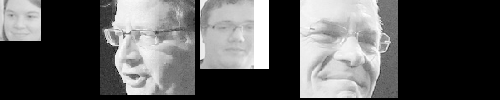



Result found in file: a-2.png


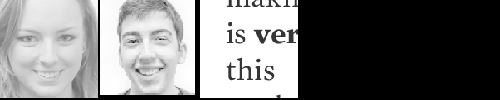



Result found in file: a-3.png


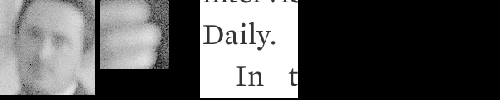

In [50]:
#### MAIN ####



Word = 'i'

filesList = []






## opening zip file and generating a list of list that contains [filename, picture in Pil.Image format].

#opening zip file
from zipfile import ZipFile
with ZipFile ('readonly/small_img.zip', 'r') as zipObj:
    #getting list of filenames from zip
    listOfiles = zipObj.namelist()
    for fileName in listOfiles:
        #getting the file in bytes format
        data = zipObj.read(fileName)
        #from bytes formate making it numpy.ndarray
        img = cv.imdecode(np.frombuffer(data, np.uint8), cv.IMREAD_GRAYSCALE)
        # making picture in PIL.Image forame from ndarray
        Img = Image.fromarray(img, mode='L')
        #making list [filename, object file] and append it to filesList
        lst = [fileName, Img]
        filesList.append(lst)

    
final_files_list = []    

## making list for everyfile [name, picture, wordlist, facebar] with functions
## for searching 'Word' in all the wordllists later
print ('------ Generating File lists --------')
for filelst in filesList:
    print('started file: {}'.format(filelst))
    wordlist = PicToListOfWords(filelst[1])
    lst = [filelst[0], filelst[1], wordlist]
    final_files_list.append(lst)
    
    
## searching if the word is in everyfile. if it does making a facebar and display it (if doesnt find faces write it)
print ('-------- Generating pictures -------')
for file in final_files_list: 
    if Word.lower() in file[2]:
        print ("Result found in file: {}".format(file[0]))
        facebar = FaceBar(file[1])
        if (facebar != 'Null'):
            display (facebar)
            print ("\n")
        else:
            print("But there were no faces in that file!")
            print ("\n")
        

    
    
    
    
    

------ Generating File lists --------
started file: ['a-0.png', <PIL.Image.Image image mode=L size=3600x6300 at 0x7F9F2FEABAC8>]
<PIL.Image.Image image mode=L size=3600x6300 at 0x7F9F2FEABAC8>
-------- Generating pictures -------
Result found in file: ['a-0.png', <PIL.Image.Image image mode=L size=3600x6300 at 0x7F9F2FEABAC8>]


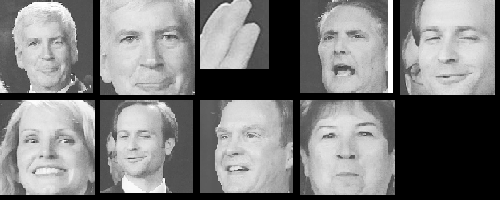

In [42]:
### TESTS  Only Do NOT Run It######


Word = 'won'

filesList = []






## opening zip file and generating a list of list that contains [filename, picture in Pil.Image format].

#opening zip file
from zipfile import ZipFile
with ZipFile ('readonly/small_img.zip', 'r') as zipObj:
    #getting list of filenames from zip
    listOfiles = zipObj.namelist()
    for fileName in listOfiles:
        #getting the file in bytes format
        data = zipObj.read(fileName)

        #from bytes formate making it numpy.ndarray
        img = cv.imdecode(np.frombuffer(data, np.uint8), cv.IMREAD_GRAYSCALE)
        # making picture in PIL.Image forame from ndarray
        Img = Image.fromarray(img, mode='L')
        #making list [filename, object file] and append it to filesList
        lst = [fileName, Img]
        filesList.append(lst)

    
final_files_list = []    

## making list for everyfile [name, picture, wordlist, facebar] with functions
## for searching 'Word' in all the wordllists later
print ('------ Generating File lists --------')

print('started file: {}'.format(filesList[0]))
print (filesList[0][1])
#display ((filesList[0][1])
wordlist = PicToListOfWords(filesList[0][1])
lst = [filesList[0], filesList[0][1], wordlist]
final_files_list.append(lst)
    
    
## searching if the word is in everyfile. if it does making a facebar and display it (if doesnt find faces write it)
print ('-------- Generating pictures -------')
if Word.lower() in lst[2]:

    print ("Result found in file: {}".format(final_files_list[0][0]))
    facebar = FaceBar(final_files_list[0][1])
    if (facebar != 'Null'):
        display (facebar)
        print ("\n")
    else:
        print("But there were no faces in that file!")
        print ("\n")
        

    